# Lecture 6

In [48]:
from tensorflow import keras
from matplotlib import pyplot as plt

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

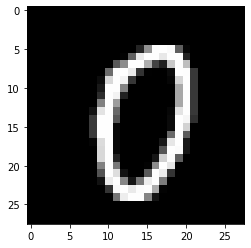

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

In [12]:
plt.imshow(train_x[1000], plt.cm.gray)
plt.show()
print(train_x[1000])

## Feed Forward MNIST

In [49]:
import numpy as np

# normalize inputs
train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

# convert labels to one-hot encoded vectors
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

In [35]:
input_layer = keras.layers.Input((28, 28))
flat = keras.layers.Flatten()(input_layer)
dense1 = keras.layers.Dense(784, activation='relu')(flat)
dense2 = keras.layers.Dense(100, activation='relu')(dense1)
output = keras.layers.Dense(10, activation='sigmoid')(dense2)
model = keras.models.Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(0.1),
              metrics=['categorical_accuracy'])

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_x, 
                    train_y,
                    batch_size=128,
                    validation_split=0.15,
                    shuffle=True,
                    epochs=20,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
399/399 [==============================] - 3s 6ms/step - loss: 0.4243 - categorical_accuracy: 0.8819 - val_loss: 0.2137 - val_categorical_accuracy: 0.9406
Epoch 2/20
399/399 [==============================] - 2s 6ms/step - loss: 0.2030 - categorical_accuracy: 0.9415 - val_loss: 0.1519 - val_categorical_accuracy: 0.9581
Epoch 3/20
399/399 [==============================] - 2s 6ms/step - loss: 0.1466 - categorical_accuracy: 0.9576 - val_loss: 0.1342 - val_categorical_accuracy: 0.9622
Epoch 4/20
399/399 [==============================] - 2s 6ms/step - loss: 0.1156 - categorical_accuracy: 0.9673 - val_loss: 0.1187 - val_categorical_accuracy: 0.9659
Epoch 5/20
399/399 [==============================] - 2s 6ms/step - loss: 0.0930 - categorical_accuracy: 0.9730 - val_loss: 0.0943 - val_categorical_accuracy: 0.9728
Epoch 6/20
399/399 [==============================] - 2s 6ms/step - loss: 0.0768 - categorical_accuracy: 0.9783 - val_loss: 0.0891 - val_categorical_accuracy: 0.9754
Epoc

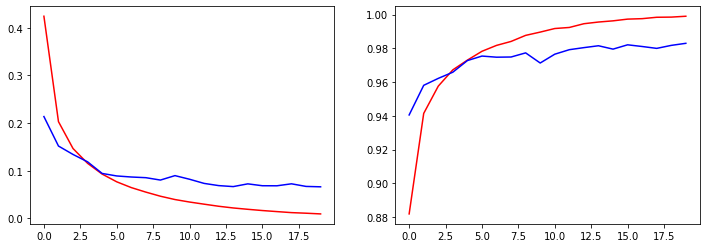

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

epochs_list = list(range(history.params['epochs']))
axs[0].plot(epochs_list, history.history['loss'], color='red')
axs[0].plot(epochs_list, history.history['val_loss'], color='blue')
axs[1].plot(epochs_list, history.history['categorical_accuracy'], color='red')
axs[1].plot(epochs_list, history.history['val_categorical_accuracy'], color='blue')
plt.show()

In [51]:
results = model.evaluate(test_x, test_y, verbose=0)
print("test loss:", results[0])
print("test accuracy:", results[1])

test loss: 0.06321380287408829
test accuracy: 0.9803000092506409


## Conv MNIST

In [52]:
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

train_x.shape

(60000, 28, 28, 1)

In [53]:
input_layer = keras.layers.Input((28, 28, 1))
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
flat = keras.layers.Flatten()(pool2)
output = keras.layers.Dense(10, activation='sigmoid')(flat)
model = keras.models.Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0   

In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(0.1),
              metrics=['categorical_accuracy'])

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_x, 
                    train_y,
                    batch_size=128,
                    validation_split=0.15,
                    shuffle=True,
                    epochs=20,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
399/399 [==============================] - 7s 17ms/step - loss: 0.4103 - categorical_accuracy: 0.8779 - val_loss: 0.1664 - val_categorical_accuracy: 0.9489
Epoch 2/20
399/399 [==============================] - 7s 17ms/step - loss: 0.1114 - categorical_accuracy: 0.9665 - val_loss: 0.0866 - val_categorical_accuracy: 0.9733
Epoch 3/20
399/399 [==============================] - 7s 19ms/step - loss: 0.0845 - categorical_accuracy: 0.9745 - val_loss: 0.0657 - val_categorical_accuracy: 0.9812
Epoch 4/20
399/399 [==============================] - 8s 19ms/step - loss: 0.0694 - categorical_accuracy: 0.9786 - val_loss: 0.0659 - val_categorical_accuracy: 0.9814
Epoch 5/20
399/399 [==============================] - 8s 20ms/step - loss: 0.0609 - categorical_accuracy: 0.9811 - val_loss: 0.0552 - val_categorical_accuracy: 0.9851
Epoch 6/20
399/399 [==============================] - 8s 20ms/step - loss: 0.0545 - categorical_accuracy: 0.9835 - val_loss: 0.0613 - val_categorical_accuracy: 0.981

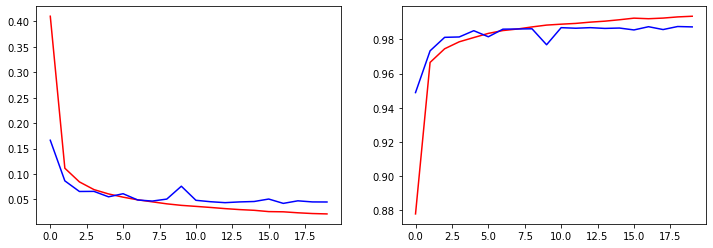

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

epochs_list = list(range(history.params['epochs']))
axs[0].plot(epochs_list, history.history['loss'], color='red')
axs[0].plot(epochs_list, history.history['val_loss'], color='blue')
axs[1].plot(epochs_list, history.history['categorical_accuracy'], color='red')
axs[1].plot(epochs_list, history.history['val_categorical_accuracy'], color='blue')
plt.show()

In [56]:
results = model.evaluate(test_x, test_y, verbose=0)
print("test loss:", results[0])
print("test accuracy:", results[1])

test loss: 0.03989076614379883
test accuracy: 0.9878000020980835


## Conv MNIST with LeakyReLU and Nesterov Momentum

In [69]:
input_layer = keras.layers.Input((28, 28, 1))

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation=None)(input_layer)
conv1 = keras.layers.LeakyReLU(0.01)(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation=None)(pool1)
conv2 = keras.layers.LeakyReLU(0.01)(conv2)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

flat = keras.layers.Flatten()(pool2)
dropout = keras.layers.Dropout(0.5)(flat)
output = keras.layers.Dense(10, activation='sigmoid')(dropout)

model = keras.models.Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 11, 11, 64)        0         
                                                          

In [70]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(0.1, momentum=0.9, nesterov=True),
              metrics=['categorical_accuracy'])

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_x, 
                    train_y,
                    batch_size=128,
                    validation_split=0.15,
                    shuffle=True,
                    epochs=20,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
399/399 [==============================] - 11s 25ms/step - loss: 0.2541 - categorical_accuracy: 0.9223 - val_loss: 0.0644 - val_categorical_accuracy: 0.9803
Epoch 2/20
399/399 [==============================] - 10s 25ms/step - loss: 0.0896 - categorical_accuracy: 0.9711 - val_loss: 0.0445 - val_categorical_accuracy: 0.9870
Epoch 3/20
399/399 [==============================] - 10s 25ms/step - loss: 0.0719 - categorical_accuracy: 0.9777 - val_loss: 0.0387 - val_categorical_accuracy: 0.9890
Epoch 4/20
399/399 [==============================] - 10s 25ms/step - loss: 0.0654 - categorical_accuracy: 0.9794 - val_loss: 0.0402 - val_categorical_accuracy: 0.9883
Epoch 5/20
399/399 [==============================] - 10s 26ms/step - loss: 0.0578 - categorical_accuracy: 0.9811 - val_loss: 0.0374 - val_categorical_accuracy: 0.9889
Epoch 6/20
399/399 [==============================] - 10s 25ms/step - loss: 0.0542 - categorical_accuracy: 0.9829 - val_loss: 0.0359 - val_categorical_accuracy:

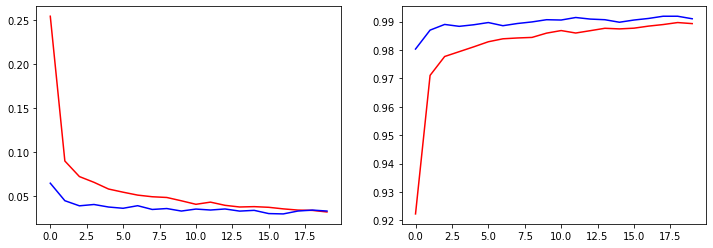

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

epochs_list = list(range(history.params['epochs']))
axs[0].plot(epochs_list, history.history['loss'], color='red')
axs[0].plot(epochs_list, history.history['val_loss'], color='blue')
axs[1].plot(epochs_list, history.history['categorical_accuracy'], color='red')
axs[1].plot(epochs_list, history.history['val_categorical_accuracy'], color='blue')
plt.show()

In [72]:
results = model.evaluate(test_x, test_y, verbose=0)
print("test loss:", results[0])
print("test accuracy:", results[1])

test loss: 0.02580391801893711
test accuracy: 0.9919000267982483
